# Classification Predict Student Solution

© Explore Data Science Academy

Honour Code
We {NM_1 Tech_Gurus}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code.

Non-compliance with the honour code constitutes a material breach of contract.

Predict Overview: EA - Twitter Sentiment Classification
Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

# INTRODUCTION

In the modern business landscape, many organizations are passionately embedding eco-conscious principles into their foundation, seeking to mitigate environmental impacts and promote sustainability. These companies offer a variety of products and services that align seamlessly with their green ethos. A crucial part of their strategic marketing is understanding how the public perceives the looming threat of climate change and the extent to which they view it as an immediate concern. This knowledge will provide a critical lens through which to anticipate how their offerings may resonate with potential consumers.

Set against this backdrop, EDSA puts forth an exhilarating challenge during the Classification Sprint. Participants are tasked to construct a machine learning model with the ability to discern whether individuals believe in climate change or not, harnessing the power of unique tweet data for this purpose.

A comprehensive and precise solution to this challenge equips businesses with a key to unlock expansive consumer sentiment insights. These insights cut across a diverse array of demographic and geographic categories, paving the way for an enriched understanding that can underpin and shape their future marketing strategies

In [1]:
from IPython.display import Image
image_url = 'https://media.proprofs.com/images/QM/user_images/2286127/1551760625.jpg'
Image(url=image_url)

# Problem Statement
Companies operating in various industries need a reliable solution to understand the sentiments expressed by Twitter users regarding climate change. This information is crucial for making informed decisions, developing effective marketing strategies, and aligning their messaging with public sentiment. However, without a robust classification model, companies face challenges in accurately predicting sentiment and extracting valuable insights from the vast amount of data available on social media platforms. To address this problem, companies require a comprehensive sentiment analysis model that can provide real-time monitoring, sentiment classification, and trend analysis to help them stay ahead of the curve and effectively respond to the evolving concerns and preferences of their target audience.

In this notebook we set out to analyze tweets collected between Apr 27, 2015 and Feb 21, 2018 regarding climate change. We further wish to train a suitable and high performing classification model, to help classify the tweets into their respective sentiment categories regarding climate change.

# Table of Contents

1. [Introduction to Package Imports](#Introduction-to-Package-Imports)
2. [Data Loading Procedures](#Data-Loading-Procedures)
3. [Delving into Data: Exploratory Analysis](#Delving-into-Data:-Exploratory-Analysis)
4. [Crafting Data: Engineering Steps](#Crafting-Data:-Engineering-Steps)
5. [Building Models: Techniques and Approaches](#Building-Models:-Techniques-and-Approaches)
6. [Assessing Model Performance](#Assessing-Model-Performance)
7. [Understanding Model Explanations](#Understanding-Model-Explanations)

# 1. Importing Packages

In [2]:
from comet_ml import Experiment

experiment = Experiment(
  api_key="iI4wg734rkuRFaqwXKZNNY2WW",
  project_name="nm-1-coders",
  workspace="thato-rabodiba"
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/thato-rabodiba/nm-1-coders/2bf23ecba2d74add963324b2acc2fd18



In [3]:
experiment.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/thato-rabodiba/nm-1-coders/2bf23ecba2d74add963324b2acc2fd18
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     git metadata                 : 1
COMET INFO:     git-patch (uncompressed)     : 1 (15.48 MB)
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     source_code                  : 1
COMET INFO: 


In [1]:
# Libraries for data loading, data manipulation, and data visualization
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Library for basic plotting in Python
import seaborn as sns  # Library for statistical data visualization
import plotly.express as px  # Library for interactive visualizations
from IPython.core.display import HTML  # Library for rendering HTML content in Jupyter Notebook
import string

# Libraries for data preparation and model building
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# 2. Loading the Data
[Back to Table of Contents](#Table-of-Contents)

⚡ Description: Loading the data ⚡
In this section you are required to load the data from the df_train file into a DataFrame.

In [2]:
# Load the data
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test_with_no_labels.csv")

In [3]:
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954



The code df_train.head() displays the first 5 rows of the DataFrame df_train.

In [4]:
df_train.tail()

,sentiment,message,tweetid
15814,1,RT @ezlusztig: They took down the material on ...,22001
15815,2,RT @washingtonpost: How climate change could b...,17856
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732
15818,0,RT @Chet_Cannon: .@kurteichenwald's 'climate c...,806319


The code displays a new DataFrame containing the specified number of rows from the end of the original DataFrame. The output includes both the column names and the corresponding data for those rows.

In [5]:
df_train.shape

(15819, 3)

The code df_train.shape provides a concise summary of the dimensions of the Pandas DataFrame df_train. In other words, it tells you how many rows (observations) and columns (features) exist in the DataFrame.

In [6]:
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [7]:
df_test.shape

(10546, 2)

# 2.1 Data Cleaning

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


The df_train.info() code provides a valuable snapshot of your DataFrame's structure and data characteristics. It helps you identify potential issues with missing values, data type mismatches, or unexpected memory usage, allowing you to make informed decisions about data cleaning, analysis, and modeling.

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


The code df_test.info() provides a concise overview of the DataFrame df_test, offering valuable insights into its structure and data types.

Overall, df_test.info() provides a quick and informative summary of the essential characteristics of your DataFrame, enabling you to make informed decisions about data cleaning, exploration, and analysis.

In [10]:
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

The code df_train.isnull().sum() calculates and returns the number of null values (missing values) for each column in the DataFrame df_train.

So, the combined expression df_train.isnull().sum() essentially counts the number of True values (null values) for each column in the original DataFrame and returns a Series (single-dimensional array) containing these counts.

In [11]:
df_test.isnull().sum()

message    0
tweetid    0
dtype: int64

*This code is a common way to quickly assess the presence and extent of missing data in a DataFrame.

*It's often used in data cleaning and preparation stages to identify columns that might need further handling or imputation of missing values.

*Understanding missing data is crucial for ensuring accurate analysis and modeling results.

To remove the punction marks, @mentions and special characters, we create a function

In [12]:
import re

def clean_tweet(twts):
    ''' This function takes a array, list or series like objects containing tweets
        and replace all with empty pace, and convert to lower case
    '''
    
    # to convert to lower case
    twts = twts.lower()
    
    
    # Remove mentions (e.g., @username)
    twts = re.sub(r'@[A-Za-z0-9_]+', '', twts)

    # Remove URLs (e.g., https://example.com)
    twts = re.sub(r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+', '', twts)

    # Remove punctuation marks
    twts = re.sub(r'[^\w\s]', '', twts)

    return twts

In [13]:
#df = df_train.copy() # assign the dataframe to a new object

#df = pd.concat([df_train,df_test])

df = df_train

df['message'] = df['message'].apply(clean_tweet)

In [14]:
df_test.message = df_test.message.apply(clean_tweet)

In [15]:
df.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,rt researchers say we have three years to act...,698562
3,1,todayinmaker wired 2016 was a pivotal year in...,573736
4,1,rt its 2016 and a racist sexist climate chang...,466954


In [16]:
df.tail()

,sentiment,message,tweetid
15814,1,rt they took down the material on global warm...,22001
15815,2,rt how climate change could be breaking up a ...,17856
15816,0,notiven rt nytimesworld what does trump actual...,384248
15817,-1,rt hey liberals the climate change crap is a ...,819732
15818,0,rt s climate change equation in 4 screenshots,806319


In [17]:
df.shape

(15819, 3)

In [18]:
# check for duplicate row in the data frame

df.duplicated().sum()

0

In [19]:
with pd.option_context('display.max_colwidth', None):
  display(df)

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what via,625221
1,1,its not like we lack evidence of anthropogenic global warming,126103
2,2,rt researchers say we have three years to act on climate change before its too late,698562
3,1,todayinmaker wired 2016 was a pivotal year in the war on climate change,573736
4,1,rt its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight,466954
...,...,...,...
15814,1,rt they took down the material on global warming lgbt rights and health care but now theyre hocking melanias qvc https,22001
15815,2,rt how climate change could be breaking up a 200millionyearold relationship,17856
15816,0,notiven rt nytimesworld what does trump actually believe about climate change rick perry joins other aides in,384248
15817,-1,rt hey liberals the climate change crap is a hoax that ties to agenda2030\nthe climate is being changed byãââ,819732


In [20]:
# Function to remove 'RT' from tweets
def remove_rt(tweet):
    return tweet.replace('rt', '')

# Apply the function to the 'tweets' column
df['message'] = df['message'].apply(remove_rt)

In [21]:
df_test.message = df_test.message.apply(remove_rt)

In [22]:
with pd.option_context('display.max_colwidth', None):
  display(df)

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what via,625221
1,1,its not like we lack evidence of anthropogenic global warming,126103
2,2,researchers say we have three years to act on climate change before its too late,698562
3,1,todayinmaker wired 2016 was a pivotal year in the war on climate change,573736
4,1,its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight,466954
...,...,...,...
15814,1,they took down the material on global warming lgbt rights and health care but now theyre hocking melanias qvc https,22001
15815,2,how climate change could be breaking up a 200millionyearold relationship,17856
15816,0,notiven nytimesworld what does trump actually believe about climate change rick perry joins other aides in,384248
15817,-1,hey liberals the climate change crap is a hoax that ties to agenda2030\nthe climate is being changed byãââ,819732


In [23]:
#removes all non-english (non-ascii) characters
def remove_non_ascii(message):
    return ''.join([l for l in message if l in string.printable])

df['message'] = df['message'].apply(remove_non_ascii)

In [24]:
df_test.message = df_test.message.apply(remove_non_ascii)

# NOTE: | Our data is relatively clean now we can move on with the EDA section to understand more about the data |

In [25]:
with pd.option_context('display.max_colwidth', None):
  display(df)

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what via,625221
1,1,its not like we lack evidence of anthropogenic global warming,126103
2,2,researchers say we have three years to act on climate change before its too late,698562
3,1,todayinmaker wired 2016 was a pivotal year in the war on climate change,573736
4,1,its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight,466954
...,...,...,...
15814,1,they took down the material on global warming lgbt rights and health care but now theyre hocking melanias qvc https,22001
15815,2,how climate change could be breaking up a 200millionyearold relationship,17856
15816,0,notiven nytimesworld what does trump actually believe about climate change rick perry joins other aides in,384248
15817,-1,hey liberals the climate change crap is a hoax that ties to agenda2030\nthe climate is being changed by,819732


In [26]:
with pd.option_context('display.max_colwidth', None):
  display(df_test)

,message,tweetid
0,europe will now be looking to china to make sure that it is not alone in fighting climate change,169760
1,combine this with the polling of staffers re climate change and womens rights and you have a fascist state,35326
2,the scary unimpeachable evidence that climate change is already here itstimetochange climatechange,224985
3,\nputin got to you too jill \ntrump doesnt believe in climate change at all \nthinks its s hoax,476263
4,female orgasms cause global warming\nsarcastic republican,872928
...,...,...
10541,brb writing a poem about climate change climatechange science poetry fakenews alternativefacts,895714
10542,2016 the year climate change came home during the hottest year on record karl mathiesen travelled to tasmania,875167
10543,pacific countries positive about fiji leading the global climate change conference in november,78329
10544,youre so hot you must be the cause for global warming aldublaboroflove,867455


# 3. Exploratory Data Analysis (EDA)
[Back to Table of Contents](#Table-of-Contents)

⚡ Description: Exploratory data analysis ⚡ In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame.

Given that we're dealing with numerical data, let's conduct a statistical analysis, specifically focusing on generating the five-number summary.

In [27]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
sentiment,15819.0,0.917504,0.836537,-1.0,1.0,1.0,1.0,2.0
tweetid,15819.0,501719.433656,289045.983132,6.0,253207.5,502291.0,753769.0,999888.0


In [28]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
tweetid,10546.0,496899.936943,288115.677148,231.0,246162.5,495923.0,742250.0,999983.0


This approach allows us to analyze the skewness of the combined dataset, providing insights into the distribution of numerical features across both training and testing data.

In [29]:
# Concatenate df_train and df_test
df_combined = pd.concat([df_train, df_test], ignore_index=True)

# Select only numeric columns
numeric_columns = df_combined.select_dtypes(include=['float64', 'int64'])

# Compute skewness for numeric columns
skewness = numeric_columns.skew()

# Print skewness values
print(skewness)

sentiment   -0.683959
tweetid     -0.003804
dtype: float64


This concatenates the df_train and df_test dataframes to create a combined dataframe (df_combined). It then selects only the numeric columns from this combined dataframe and computes the kurtosis for each numeric column.

In [30]:
# Concatenate df_train and df_test
df_combined = pd.concat([df_train, df_test], ignore_index=True)

# Select only numeric columns
numeric_columns = df_combined.select_dtypes(include=['float64', 'int64'])

# Compute kurtosis for numeric columns
kurtosis_values = numeric_columns.kurtosis()

# Print kurtosis values
print(kurtosis_values)

sentiment    0.122976
tweetid     -1.193841
dtype: float64


The bar plot above illustrates the distribution of tweets across different sentiment classes.

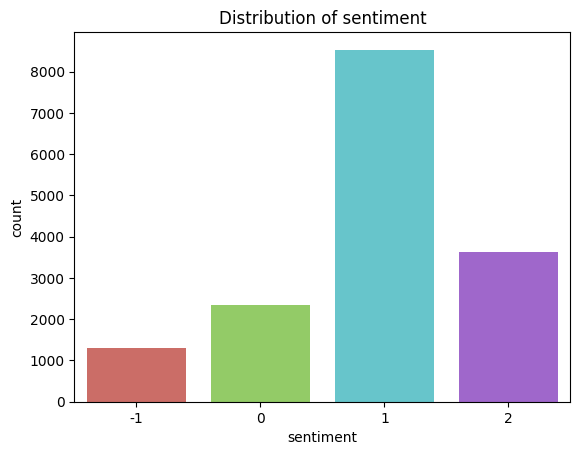

In [31]:
# To visualize the distributon of the sentiments, we plot a count plot and the unique sentiments we have 

sns.countplot(x = 'sentiment', data = df, palette="hls")
plt.title("Distribution of sentiment");

['pro' 'news' 'neutral' 'anti']


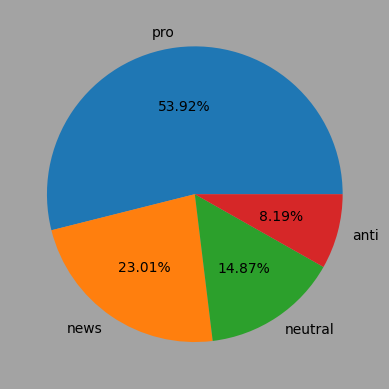

In [32]:
pie_x = df.sentiment.value_counts()
labels = df.sentiment.unique()


# Define the label mapping dictionary
label_mapping = {1: 'pro', 2: 'news', 0: 'neutral', -1: 'anti'}

# Create a vectorized function to apply the mapping
vfunc = np.vectorize(lambda x: label_mapping[x])

# Apply the mapping to the labels
mapped_labels = vfunc(labels)
print(mapped_labels)

# Remove the white background
plt.figure().set_facecolor('#A3A3A3')
plt.pie(df['sentiment'].value_counts(),autopct='%0.2f%%', labels = mapped_labels)
plt.show()

Observation:
from the bar graph above, we can deduce that we have 4 groups of sentiments.

1.the sentiment is imbalanced

2.let explore the tweets to generate insights

To create a word cloud we first need to tokenize the tweets, lemmatize or stem the words and then join all as single sentences to create the word cloud

*The word cloud will be divided into two groups one for people who believe in the effect of climate change and the other for those who do not beleieve

In [33]:
# import the word tokenizer to tokenize the twts, and lemmatizer to find the root word of the words in each message
# from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords, wordnet

In [34]:
#Initialise the lemmatizer
lemma = WordNetLemmatizer()

# # Define a function to lemmatize a single tweet
# def lemmatize_tweet(tweet):
    
#     # Lemmatize each word and join them back into a single string
#     lemmatized_words = [lemma.lemmatize(twt) for twt in tweet]
#     lemmatized_tweet = ' '.join(lemmatized_words)

#     return lemmatized_tweet

def lemmatize_tweet(df):
    df["length"] = df["message"].str.len()
    df["tokenized"] = df["message"].apply(word_tokenize)
    df["parts-of-speech"] = df["tokenized"].apply(nltk.tag.pos_tag)
    
    def str2wordnet(tag):
        conversion = {"J": wordnet.ADJ, "V": wordnet.VERB, "N": wordnet.NOUN, "R": wordnet.ADV}
        try:
            return conversion[tag[0].upper()]
        except KeyError:
            return wordnet.NOUN
    
    
    df["parts-of-speech"] = df["parts-of-speech"].apply(
        lambda tokens: [(word, str2wordnet(tag)) for word, tag in tokens]
    )
    df["clean_tweet"] = df["parts-of-speech"].apply(
        lambda tokens: [lemma.lemmatize(word, tag) for word, tag in tokens]
    )
    df["clean_tweet"] = df["clean_tweet"].apply(lambda tokens: " ".join(map(str, tokens)))
    
    return df

In [35]:
# df['clean_tweet'] = df['message'].apply(lemmatize_tweet)
df = lemmatize_tweet(df)

In [36]:
df_test = lemmatize_tweet(df_test)

Next, we'll move forward with Graphical Analysis to delve into patterns, correlations, and trends. This will allow us to visually explore and understand the data in a more intuitive manner.

This displays a histogram and desnsity plot of the numerical features in the dataset.

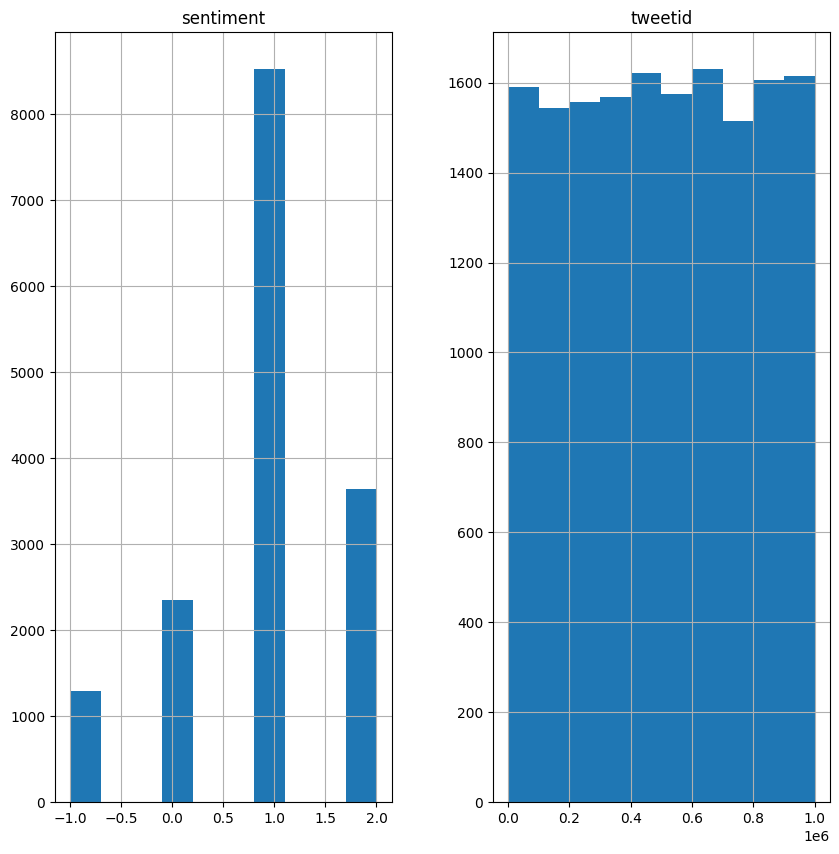

In [37]:
features = ['sentiment', 'tweetid'] # create a list of all numerical features
df_train[features].hist(figsize=(10,10));


Both the histogram and density plot convey identical information.

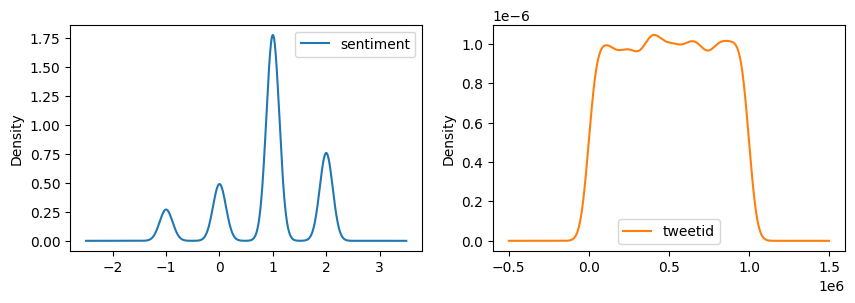

In [38]:
df_train[features].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10));

The boxplot reveals the presence of outliers(dots) in the 'sentiment' feature.

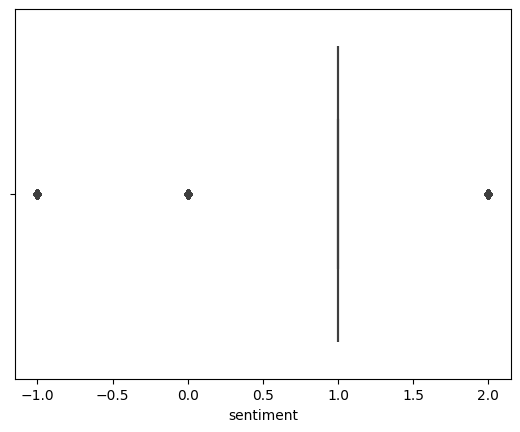

In [39]:
sns.boxplot(x='sentiment', data=df_train);

The box plot provides detailed information about the distribution of the data, indicating that there are no outliers present based on the five-number summary.

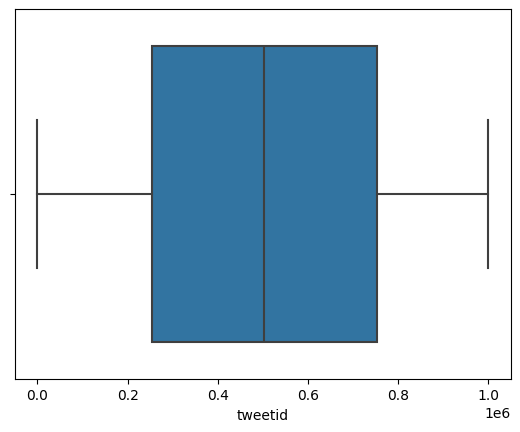

In [40]:
sns.boxplot(x='tweetid', data=df_train);

Label Encoding converts categorical labels into numerical labels. It assigns a unique integer to each category in the 'message' column. This is accomplished using the LabelEncoder class from the sklearn.preprocessing module.

In [41]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_train['message'] = label_encoder.fit_transform(df_train['message'])

# One-Hot Encoding (for nominal categorical variables)
df_train_encoded = pd.get_dummies(df_train, columns=['message'])

In [42]:
# Check data types of all columns
print(df_train_encoded.dtypes)

sentiment           int64
tweetid             int64
length              int64
tokenized          object
parts-of-speech    object
                    ...  
message_13649        bool
message_13650        bool
message_13651        bool
message_13652        bool
message_13653        bool
Length: 13660, dtype: object


In [43]:
# Convert all columns to numeric type, coercing non-numeric values to NaN
df_train_encoded = df_train_encoded.apply(pd.to_numeric, errors='coerce')

# Check for any remaining non-numeric values
non_numeric_values = df_train_encoded.select_dtypes(exclude=['number'])
print(non_numeric_values)

       message_0  message_1  message_2  message_3  message_4  message_5  \
0          False      False      False      False      False      False   
1          False      False      False      False      False      False   
2          False      False      False      False      False      False   
3          False      False      False      False      False      False   
4          False      False      False      False      False      False   
...          ...        ...        ...        ...        ...        ...   
15814      False      False      False      False      False      False   
15815      False      False      False      False      False      False   
15816      False      False      False      False      False      False   
15817      False      False      False      False      False      False   
15818      False      False      False      False      False      False   

       message_6  message_7  message_8  message_9  ...  message_13644  \
0          False      Fals

In [44]:
# Check for missing values
print(df_train_encoded.isnull().sum())

sentiment              0
tweetid                0
length                 0
tokenized          15819
parts-of-speech    15819
                   ...  
message_13649          0
message_13650          0
message_13651          0
message_13652          0
message_13653          0
Length: 13660, dtype: int64


The scatter plot above illustrates the relationship between sentiment and tweet ID, with the message hue encoded for additional information.

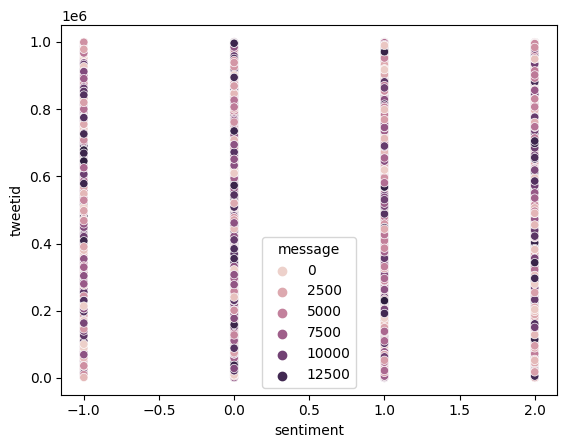

In [45]:
sns.scatterplot(x='sentiment',y='tweetid',hue='message', data=df_train);

The pairplot above displays pairwise relationships between different attributes in the dataset, with message content serving as the hue for additional differentiation.

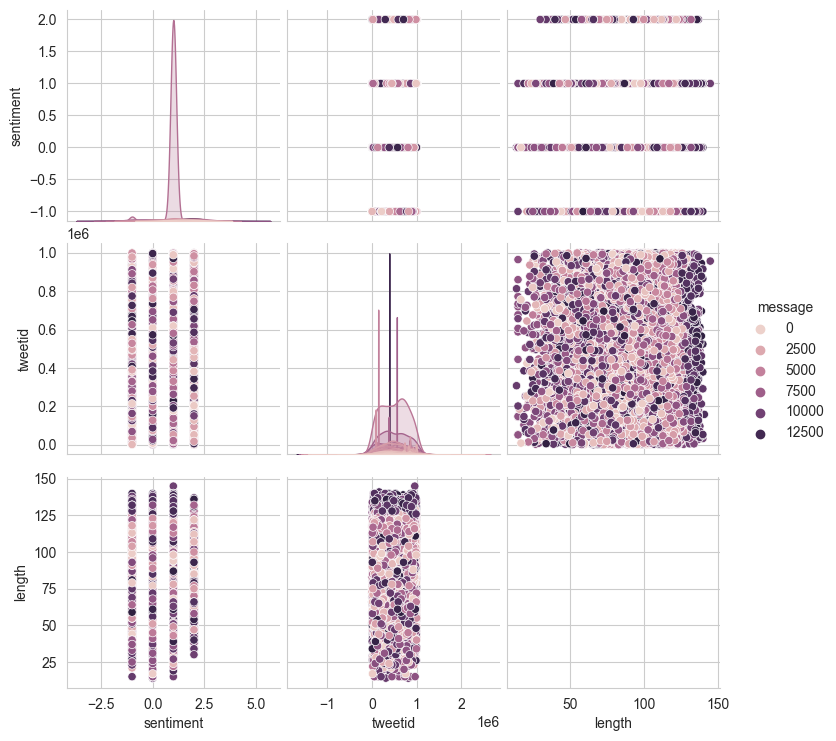

In [46]:
sns.set_style("whitegrid");
sns.pairplot(df_train, hue="message");
plt.show();

The jointplot displays the relationship between the sentiment and tweet ID attributes in the dataset.

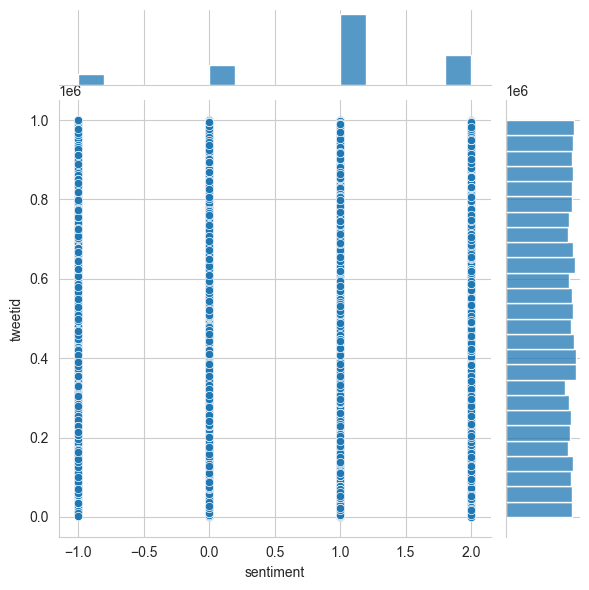

In [47]:
sns.jointplot(x = 'sentiment', y = 'tweetid', data = df_train);

We can enhance the visualization by reintroducing the message variable as a hue parameter, which will add another dimension to the plot. This means that in addition to the relationship between sentiment and tweet ID, we'll also consider the impact of the message content on this relationship.

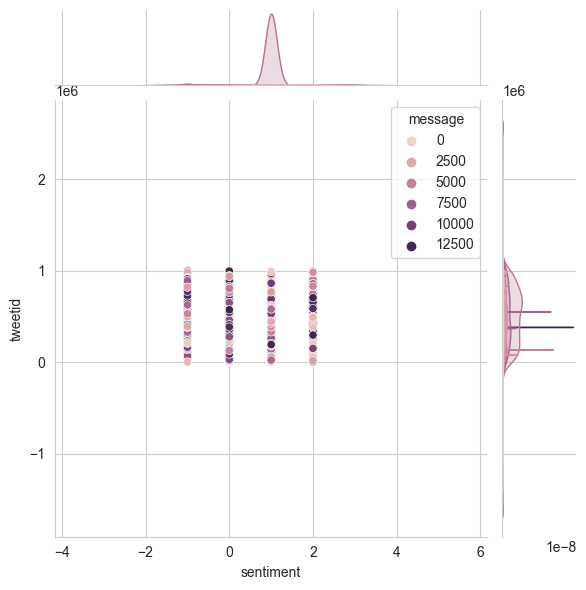

In [48]:
sns.jointplot(x = 'sentiment', y = 'tweetid', data = df_train, hue='message');

# 4. Data Engineering
[Back to Table of Contents](#Table-of-Contents)

⚡ Description: Data engineering ⚡
In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase.


This code selects specific columns from a DataFrame and creates a new DataFrame containing only those columns.

In [49]:
selected_columns = df_train[['sentiment', 'tweetid', 'message']].copy()
selected_columns.head()

,sentiment,tweetid,message
0,1,625221,12080
1,1,126103,11379
2,2,698562,5466
3,1,573736,12950
4,1,466954,3870


We are going to eliminate any unusual data points from the dataset mentioned above, if there are any, to prevent them from impacting our model's performance.

In [50]:
from scipy import stats

### Remove Outliers
selected_columns[(np.abs(stats.zscore(selected_columns)) < 3).all(axis=1)]

,sentiment,tweetid,message
0,1,625221,12080
1,1,126103,11379
2,2,698562,5466
3,1,573736,12950
4,1,466954,3870
...,...,...,...
15814,1,22001,6685
15815,2,17856,3123
15816,0,384248,11850
15817,-1,819732,3026


Next, we'll examine the data types and check for any missing values in the dataset.

In [51]:
### df_train.isnull().sum() 
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sentiment        15819 non-null  int64 
 1   message          15819 non-null  int32 
 2   tweetid          15819 non-null  int64 
 3   length           15819 non-null  int64 
 4   tokenized        15819 non-null  object
 5   parts-of-speech  15819 non-null  object
 6   clean_tweet      15819 non-null  object
dtypes: int32(1), int64(3), object(3)
memory usage: 803.4+ KB


# 5. Modelling
[Back to Table of Contents](#Table-of-Contents)

⚡ Description: Modelling ⚡
In this section, you are required to create one or more regression models that are able to accurately predict the climate change


# 6. Model Performance
[Back to Table of Contents](#Table-of-Contents)

⚡ Description: Model performance ⚡
In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why.

# 7. Model Explanations
[Back to Table of Contents](#Table-of-Contents)

⚡ Description: Model explanation ⚡
In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings.